In [40]:
# This notebook computes and visualises some statistics on the OCR quality of the data 

# marieke.van.erp@dh.huc.knaw.nl
# 2 April 2018 


import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from dateutil.parser import parse
from dateutil.tz import gettz

In [41]:
species = glob.glob('*tsv')

In [42]:
# All species in one go

import numpy as np 

np_array_list = []
for file_ in species:
    df = pd.read_csv(file_,index_col=None, header=0, sep="\t")
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
big_frame = pd.DataFrame(comb_np_array)

big_frame.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,05_Pest_control,MMSAB03:000067428:mpeg21:a0097:ocr,1939,Bredasche courant,BOSCH EN HEIDE BEDREIGD De heidevelden zijn op...,artikel,0.964211,nl,dan de verkoolde overblijfselen zoo spoedig mo...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Regionaal/lokaal,\N,\N
1,05_Pest_control,MMSADB01:000008443:mpeg21:a0024:ocr,1910,Provinciale Noordbrabantsche en 's Hertogenbos...,LANDBOUW.,artikel,0.896774,nl,namens t taatsbosch beheer een lezing gehouden...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Regionaal/lokaal,\N,\N
2,05_Pest_control,MMSAEN01:000051552:mpeg21:a0070:ocr,1933,Twentsch dagblad Tubantia en Enschedesche courant,Kunnen insectenplagen door de methode van bosc...,artikel,0.935897,nl,jonge aanplantingen steeds op haar post om haa...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Regionaal/lokaal,\N,\N
3,05_Pest_control,ddd:010029309:mpeg21:a0243:ocr,1927,Nieuwe Rotterdamsche Courant,Wetenschappelijke Berichten. De bestrijding va...,artikel,0.818942,nl,van aanwending van deze stoffen £ schry£ m s&q...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Landelijk,\N,\N
4,01_Natural_history,KBDDD02:000200891:mpeg21:a0057:ocr,1927,Voorwaarts,Dieren die geofferd worden De mol en de mode.,artikel,0.933333,nl,deze zijde ven het himalaya-gebergte voorkomt ...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Landelijk,\N,\N


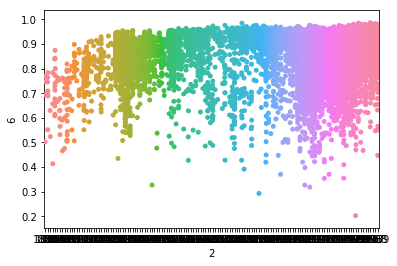

In [43]:
# Plot for comparing OCR over different newspaper titles 
# Figure 2-left in the paper 
sns.stripplot(x=2, y=6, data=big_frame, jitter=True)

In [44]:
# Create 10 13-year bins 
big_frame['binned'] = pd.cut(big_frame[2], 10, right=True)

big_frame.groupby('binned').count()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
binned,,,,,,,,,,,,,,
"(1799.861, 1813.9]",92,92,92,92,92,92,92,92,92,92,92,92,92,92
"(1813.9, 1827.8]",143,143,143,143,143,143,143,143,143,143,143,143,143,143
"(1827.8, 1841.7]",1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088
"(1841.7, 1855.6]",519,519,519,519,519,519,519,519,519,519,519,519,519,519
"(1855.6, 1869.5]",420,420,420,420,420,420,420,420,420,420,420,420,420,420
"(1869.5, 1883.4]",308,308,308,308,308,308,308,308,308,308,308,308,308,308
"(1883.4, 1897.3]",571,571,571,571,571,571,571,571,571,571,571,571,571,571
"(1897.3, 1911.2]",951,951,951,951,951,951,951,951,951,951,951,951,951,951
"(1911.2, 1925.1]",2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451


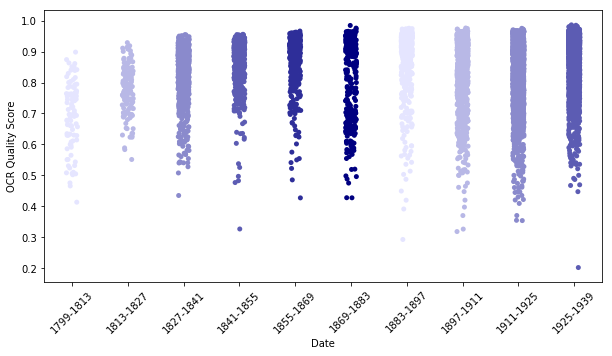

In [45]:
# Muck around with some colours and labels 
plt.figure(figsize=(10,5))

text = ["1799-1813", "1813-1827", '1827-1841', "1841-1855", "1855-1869","1869-1883", "1883-1897", "1897-1911", "1911-1925", "1925-1939"]

# plot the figure 
# Figure 2-right in the paper 
ax = sns.stripplot(x=big_frame['binned'], y=6, data=big_frame, jitter=True, palette=sns.light_palette("navy"))
ax.set_xticklabels(text, rotation='45', fontsize=10)
ax.set_xlabel('Date')
ax.set_ylabel('OCR Quality Score')
plt.show()

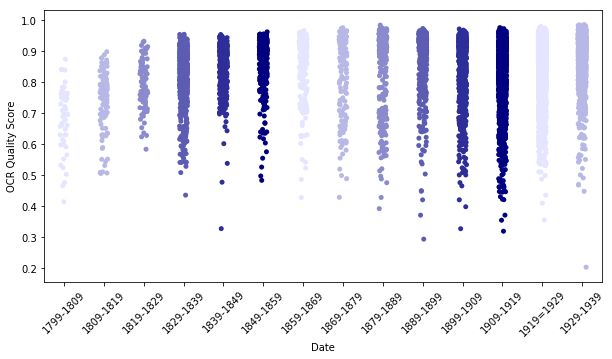

In [46]:
# Create 10 13-year bins 
big_frame['binned'] = pd.cut(big_frame[2], 14, right=True)

big_frame.groupby('binned').count()

# Muck around with some colours and labels 
plt.figure(figsize=(10,5))

text = ["1799-1809", "1809-1819", '1819-1829', "1829-1839", "1839-1849","1849-1859", "1859-1869", "1869-1879", "1879-1889", "1889-1899", "1899-1909", "1909-1919", "1919=1929", "1929-1939"]

# plot the figure 
# Figure 2-right in the paper 
ax = sns.stripplot(x=big_frame['binned'], y=6, data=big_frame, jitter=True, palette=sns.light_palette("navy"))
ax.set_xticklabels(text, rotation='45', fontsize=10)
ax.set_xlabel('Date')
ax.set_ylabel('OCR Quality Score')
plt.show()

In [1]:
big_frame.groupby('binned').count()

NameError: name 'big_frame' is not defined